## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1          X2        X3        X4           Y
0  90.242423  562.691927  0.796511  4.318857  457.135491
1  78.483981  275.486376  0.386331  5.381624  132.302076
2  16.033377  736.723778  0.062805  2.275981   48.949771
3  67.631597  522.722854  0.724223  9.878084  384.552541
4  20.655930  398.996771  0.615685  9.570272  246.367325


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0157712	total: 57.9ms	remaining: 57.8s
1:	learn: 1.0042482	total: 58.3ms	remaining: 29.1s
2:	learn: 0.9917958	total: 58.9ms	remaining: 19.6s
3:	learn: 0.9818222	total: 59.4ms	remaining: 14.8s
4:	learn: 0.9674157	total: 59.9ms	remaining: 11.9s
5:	learn: 0.9583893	total: 60.3ms	remaining: 9.99s
6:	learn: 0.9463950	total: 60.9ms	remaining: 8.63s
7:	learn: 0.9333075	total: 61.4ms	remaining: 7.61s
8:	learn: 0.9212689	total: 61.8ms	remaining: 6.81s
9:	learn: 0.9094324	total: 62.4ms	remaining: 6.18s
10:	learn: 0.8987011	total: 62.8ms	remaining: 5.65s
11:	learn: 0.8842272	total: 63.3ms	remaining: 5.21s
12:	learn: 0.8724169	total: 63.6ms	remaining: 4.83s
13:	learn: 0.8599678	total: 64.1ms	remaining: 4.52s
14:	learn: 0.8499061	total: 64.6ms	remaining: 4.24s
15:	learn: 0.8398770	total: 65ms	remaining: 4s
16:	learn: 0.8290739	total: 65.4ms	remaining: 3.78s
17:	learn: 0.8188420	total: 65.9ms	remaining: 3.59s
18:	learn: 0.8099875	total: 66.5ms	remaining: 3.4

116:	learn: 0.2644252	total: 107ms	remaining: 808ms
117:	learn: 0.2617699	total: 108ms	remaining: 805ms
118:	learn: 0.2597769	total: 108ms	remaining: 801ms
119:	learn: 0.2569629	total: 109ms	remaining: 797ms
120:	learn: 0.2535797	total: 109ms	remaining: 793ms
121:	learn: 0.2513799	total: 110ms	remaining: 789ms
122:	learn: 0.2490152	total: 110ms	remaining: 785ms
123:	learn: 0.2470717	total: 110ms	remaining: 780ms
124:	learn: 0.2453215	total: 111ms	remaining: 776ms
125:	learn: 0.2428789	total: 111ms	remaining: 773ms
126:	learn: 0.2401121	total: 112ms	remaining: 769ms
127:	learn: 0.2383615	total: 112ms	remaining: 766ms
128:	learn: 0.2361318	total: 113ms	remaining: 763ms
129:	learn: 0.2340908	total: 113ms	remaining: 759ms
130:	learn: 0.2326106	total: 114ms	remaining: 756ms
131:	learn: 0.2306279	total: 114ms	remaining: 752ms
132:	learn: 0.2286568	total: 115ms	remaining: 748ms
133:	learn: 0.2260733	total: 115ms	remaining: 744ms
134:	learn: 0.2239441	total: 115ms	remaining: 740ms
135:	learn: 

295:	learn: 0.0671465	total: 186ms	remaining: 442ms
296:	learn: 0.0668569	total: 186ms	remaining: 441ms
297:	learn: 0.0666066	total: 187ms	remaining: 440ms
298:	learn: 0.0661226	total: 187ms	remaining: 439ms
299:	learn: 0.0657771	total: 188ms	remaining: 438ms
300:	learn: 0.0653095	total: 188ms	remaining: 436ms
301:	learn: 0.0648677	total: 188ms	remaining: 435ms
302:	learn: 0.0645006	total: 189ms	remaining: 434ms
303:	learn: 0.0642823	total: 189ms	remaining: 433ms
304:	learn: 0.0640285	total: 189ms	remaining: 431ms
305:	learn: 0.0636612	total: 190ms	remaining: 430ms
306:	learn: 0.0634844	total: 190ms	remaining: 429ms
307:	learn: 0.0632822	total: 191ms	remaining: 428ms
308:	learn: 0.0629719	total: 191ms	remaining: 427ms
309:	learn: 0.0626521	total: 192ms	remaining: 426ms
310:	learn: 0.0622746	total: 192ms	remaining: 425ms
311:	learn: 0.0618425	total: 192ms	remaining: 424ms
312:	learn: 0.0616192	total: 193ms	remaining: 423ms
313:	learn: 0.0611862	total: 193ms	remaining: 422ms
314:	learn: 

534:	learn: 0.0253648	total: 289ms	remaining: 251ms
535:	learn: 0.0252364	total: 290ms	remaining: 251ms
536:	learn: 0.0251062	total: 290ms	remaining: 250ms
537:	learn: 0.0249860	total: 291ms	remaining: 249ms
538:	learn: 0.0248610	total: 291ms	remaining: 249ms
539:	learn: 0.0247438	total: 291ms	remaining: 248ms
540:	learn: 0.0246509	total: 292ms	remaining: 248ms
541:	learn: 0.0245362	total: 292ms	remaining: 247ms
542:	learn: 0.0244450	total: 293ms	remaining: 246ms
543:	learn: 0.0243245	total: 293ms	remaining: 246ms
544:	learn: 0.0242287	total: 294ms	remaining: 245ms
545:	learn: 0.0241400	total: 294ms	remaining: 244ms
546:	learn: 0.0240296	total: 294ms	remaining: 244ms
547:	learn: 0.0239425	total: 295ms	remaining: 243ms
548:	learn: 0.0238346	total: 295ms	remaining: 243ms
549:	learn: 0.0237297	total: 296ms	remaining: 242ms
550:	learn: 0.0236438	total: 296ms	remaining: 241ms
551:	learn: 0.0235286	total: 296ms	remaining: 241ms
552:	learn: 0.0234344	total: 297ms	remaining: 240ms
553:	learn: 

713:	learn: 0.0128292	total: 367ms	remaining: 147ms
714:	learn: 0.0127560	total: 368ms	remaining: 147ms
715:	learn: 0.0127363	total: 368ms	remaining: 146ms
716:	learn: 0.0126913	total: 369ms	remaining: 146ms
717:	learn: 0.0126719	total: 369ms	remaining: 145ms
718:	learn: 0.0125991	total: 370ms	remaining: 145ms
719:	learn: 0.0125553	total: 370ms	remaining: 144ms
720:	learn: 0.0124850	total: 371ms	remaining: 143ms
721:	learn: 0.0124635	total: 371ms	remaining: 143ms
722:	learn: 0.0124215	total: 372ms	remaining: 142ms
723:	learn: 0.0123904	total: 372ms	remaining: 142ms
724:	learn: 0.0123235	total: 373ms	remaining: 141ms
725:	learn: 0.0123027	total: 373ms	remaining: 141ms
726:	learn: 0.0122616	total: 374ms	remaining: 140ms
727:	learn: 0.0122214	total: 374ms	remaining: 140ms
728:	learn: 0.0122036	total: 375ms	remaining: 139ms
729:	learn: 0.0121345	total: 375ms	remaining: 139ms
730:	learn: 0.0121041	total: 375ms	remaining: 138ms
731:	learn: 0.0120398	total: 376ms	remaining: 138ms
732:	learn: 

960:	learn: 0.0064617	total: 471ms	remaining: 19.1ms
961:	learn: 0.0064376	total: 471ms	remaining: 18.6ms
962:	learn: 0.0064172	total: 472ms	remaining: 18.1ms
963:	learn: 0.0064063	total: 472ms	remaining: 17.6ms
964:	learn: 0.0063806	total: 473ms	remaining: 17.1ms
965:	learn: 0.0063698	total: 473ms	remaining: 16.6ms
966:	learn: 0.0063446	total: 473ms	remaining: 16.2ms
967:	learn: 0.0063183	total: 474ms	remaining: 15.7ms
968:	learn: 0.0063076	total: 474ms	remaining: 15.2ms
969:	learn: 0.0063020	total: 475ms	remaining: 14.7ms
970:	learn: 0.0062915	total: 475ms	remaining: 14.2ms
971:	learn: 0.0062812	total: 475ms	remaining: 13.7ms
972:	learn: 0.0062532	total: 476ms	remaining: 13.2ms
973:	learn: 0.0062431	total: 476ms	remaining: 12.7ms
974:	learn: 0.0062377	total: 477ms	remaining: 12.2ms
975:	learn: 0.0062135	total: 477ms	remaining: 11.7ms
976:	learn: 0.0061861	total: 478ms	remaining: 11.2ms
977:	learn: 0.0061625	total: 478ms	remaining: 10.8ms
978:	learn: 0.0061462	total: 479ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

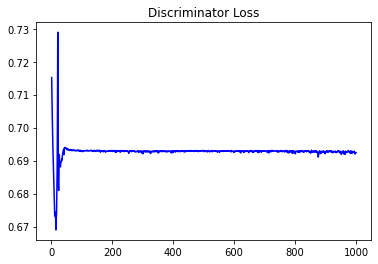

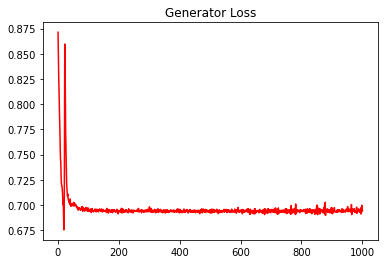

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.00525860503039165


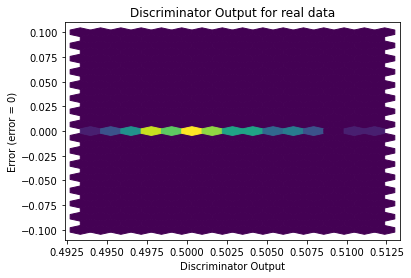

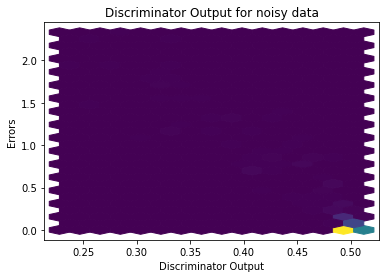

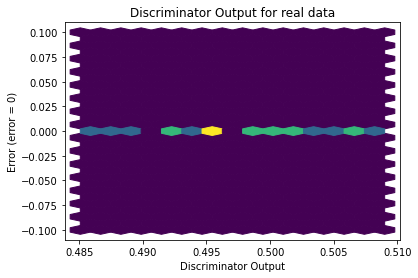

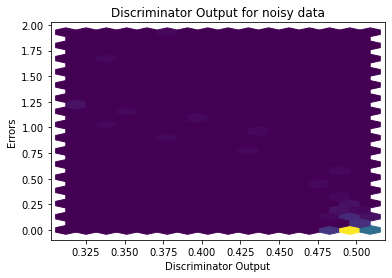

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


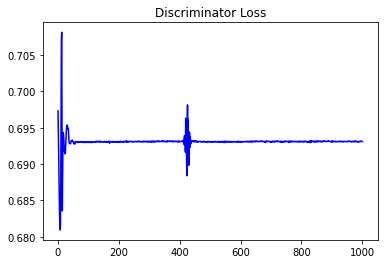

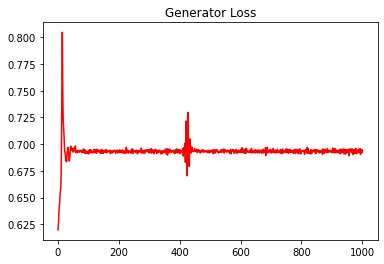

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.005922814554015674


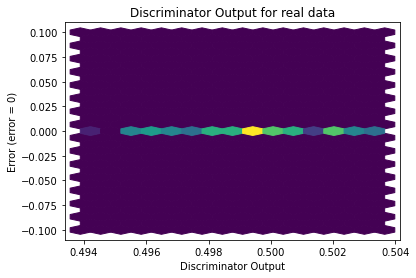

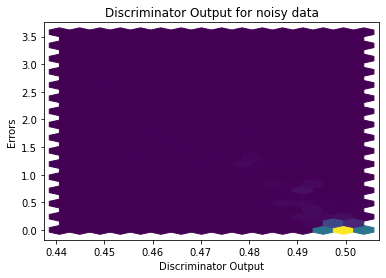

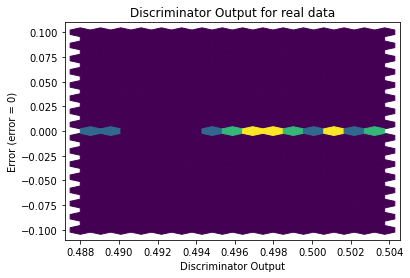

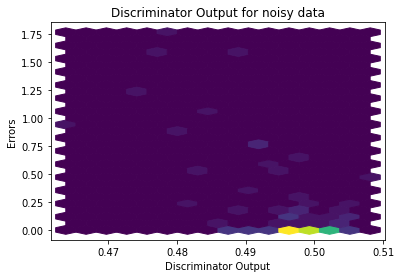

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7690]], requires_grad=True)
